<a href="https://colab.research.google.com/github/lulli30/DataSciencePractice/blob/main/RegressionBorabo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Regression using numpy (with pandas and pyplot)**

<font color="red">File access required:</font> In Colab this notebook requires first uploading files **Cities.csv** and **Players.csv** using the *Files* feature in the left toolbar. If running the notebook on a local computer, simply ensure these files are in the same workspace as the notebook.

In [1]:
# Set-up
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read Cities.csv into dataframe
f = open('Cities.csv')
cities = pd.read_csv(f)

In [3]:
cities.columns

Index(['city', 'country', 'latitude', 'longitude', 'temperature'], dtype='object')

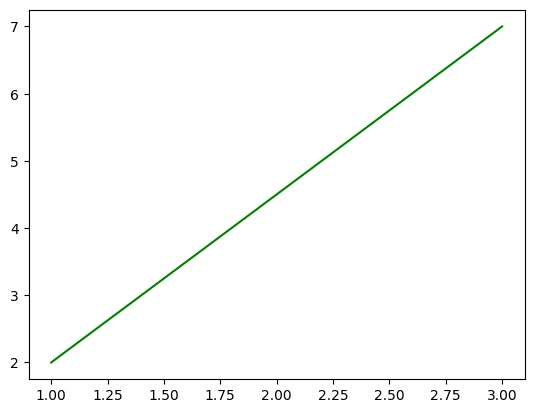

In [4]:
# Introduction to plotting a line
plt.plot([1,3], [2,7], color='green')
plt.show()

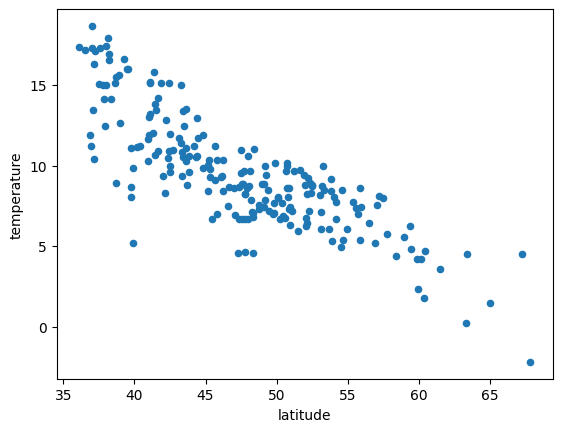

In [5]:
# Recall temperature versus latitude scatterplot
cities.plot.scatter('latitude', 'temperature')
plt.show()

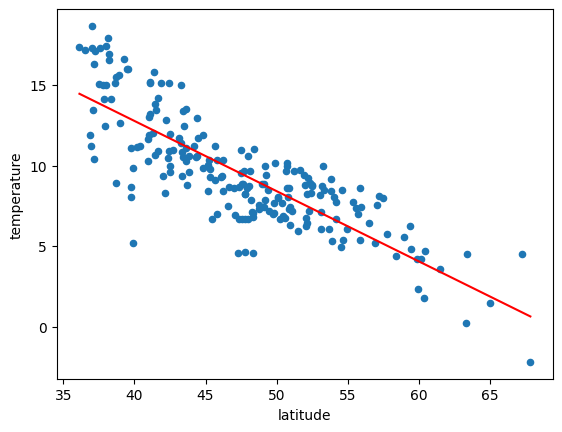

In [6]:
# Add linear regression
cities.plot.scatter('latitude', 'temperature')

a,b = np.polyfit(cities.latitude, cities.temperature, 1) # Regression line is y = mx + b

x1 = min(cities.latitude)
x2 = max(cities.latitude)

plt.plot([x1,x2], [a*x1 + b, a*x2 + b], color='red')
plt.show()

In [7]:
# Correlation coefficients (r values)
r = np.corrcoef(cities.latitude, cities.temperature)[1,0]
print('Correlation coefficient for temperature versus latitude:', r)

r = np.corrcoef(cities.longitude, cities.temperature)[1,0]
print('Correlation coefficient for temperature versus longitude:', r)

Correlation coefficient for temperature versus latitude: -0.8241046320267099
Correlation coefficient for temperature versus longitude: -0.16930750403617875


Training data:


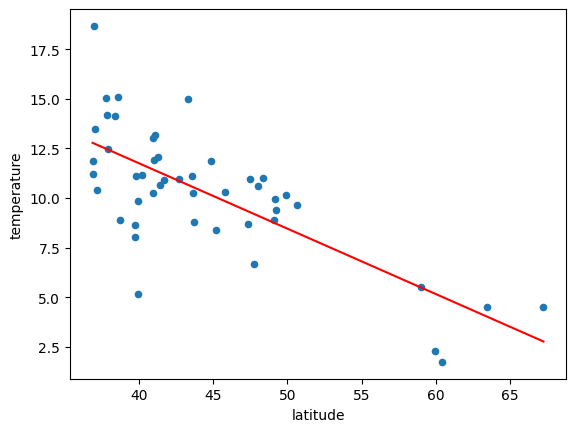

In [8]:
# Use linear regression for interactive temperature predictor
# Training data: compute and show latitude-temperature regression from cities
# in Norway, France, and Turkey
train = cities[ (cities.country=='Norway') | (cities.country=='France') | (cities.country=='Turkey')  ]
a,b = np.polyfit(train.latitude, train.temperature, 1) # y = mx + b = y = ax + b --->>>>> slope: a; intercept: b
print('Training data:')
train.plot.scatter('latitude', 'temperature')
x1 = min(train.latitude)
x2 = max(train.latitude)
plt.plot([x1,x2], [a*x1 + b, a*x2 + b], color='red')
plt.show()

In [9]:
train.head()

,city,country,latitude,longitude,temperature
3,Adana,Turkey,36.99,35.32,18.67
6,Amiens,France,49.90,2.30,10.17
10,Angers,France,47.48,-0.53,10.98
11,Ankara,Turkey,39.93,32.86,9.86
12,Antalya,Turkey,36.89,30.70,11.88


In [10]:
# Now loop asking for a city name; find the city's latitude, use the regression
# to predict the temperature, then check against the actual temperature.

while True:
    name = input('Enter city name (or "quit" to quit): ')

    if name == 'quit': break

    city = cities[cities.city == name]
    if len(city) == 0:
        print('City not in dataset')
    else:
        # Use float() to convert dataframe element to value
        print('Predicted temperature:', a * float(city.latitude) + b) # y = mx + b = y = ax + b --->>>>> slope: a; intercept: b -> trained from 3 cities only
        print('Actual temperature:', float(city.temperature))

Enter city name (or "quit" to quit): Adana


/tmp/ipython-input-1798674423.py:14: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print('Predicted temperature:', a * float(city.latitude) + b) # y = mx + b = y = ax + b --->>>>> slope: a; intercept: b -> trained from 3 cities only
/tmp/ipython-input-1798674423.py:15: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print('Actual temperature:', float(city.temperature))


Predicted temperature: 12.750248828351404
Actual temperature: 18.67
Enter city name (or "quit" to quit): quit


### <font color="green">**Your Turn: World Cup Data**</font>

In [11]:
# Read Players.csv into dataframe
f = open('Players.csv')
players = pd.read_csv(f)

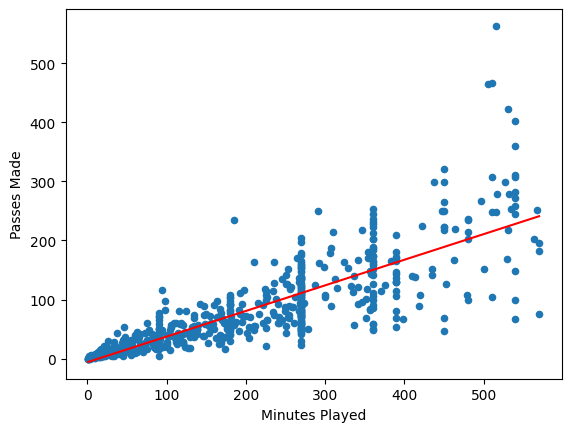

Correlation coefficient (passes vs minutes): 0.8151193157954871


In [12]:
# From the players data, compute and plot a linear regression for
# passes made (y-axis) versus minutes played (x-axis).
players.plot.scatter('minutes', 'passes')
plt.xlabel('Minutes Played')
plt.ylabel('Passes Made')

a, b = np.polyfit(players.minutes, players.passes, 1)

x1 = players.minutes.min()
x2 = players.minutes.max()

plt.plot([x1, x2], [a*x1 + b, a*x2 + b], color='red')
plt.show()

r = np.corrcoef(players.minutes, players.passes)[1, 0]
print('Correlation coefficient (passes vs minutes):', r)

In [13]:
# Show the correlation coefficients for four regressions:
# passes versus minutes, tackles versus minutes, shots versus minutes,
# and saves versus minutes. Make sure to label each one.
r = np.corrcoef(players.minutes, players.passes)[1, 0]
print('Correlation coefficient (passes vs minutes):', r)

r = np.corrcoef(players.minutes, players.tackles)[1, 0]
print('Correlation coefficient (tackles vs minutes):', r)

r = np.corrcoef(players.minutes, players.shots)[1, 0]
print('Correlation coefficient (shots vs minutes):', r)

r = np.corrcoef(players.minutes, players.saves)[1, 0]
print('Correlation coefficient (saves vs minutes):', r)

Correlation coefficient (passes vs minutes): 0.8151193157954871
Correlation coefficient (tackles vs minutes): 0.6106734613835504
Correlation coefficient (shots vs minutes): 0.40792307740541656
Correlation coefficient (saves vs minutes): 0.22847723253087998


In [15]:
# BONUS!
# Repeat the previous problem, except consider each position separately.
# That is, show correlation coefficients separately for the forwards,
# midfielders, defenders, and goalkeepers. If you get a warning, you
# may hard-code the fact that only goalkeepers make saves.
positions = ['forward', 'midfielder', 'defender', 'goalkeeper']

for pos in positions:
    subset = players[players.position == pos]
    print('\nPosition:', pos)

    # Passes vs minutes
    r = np.corrcoef(subset.minutes, subset.passes)[1, 0]
    print('  Passes vs minutes:', r)

    # Tackles vs minutes
    r = np.corrcoef(subset.minutes, subset.tackles)[1, 0]
    print('  Tackles vs minutes:', r)

    # Shots vs minutes
    r = np.corrcoef(subset.minutes, subset.shots)[1, 0]
    print('  Shots vs minutes:', r)

    # Saves vs minutes (goalkeepers only)
    if pos == 'Goalkeeper':
        r = np.corrcoef(subset.minutes, subset.saves)[1, 0]
        print('  Saves vs minutes:', r)


Position: forward
  Passes vs minutes: 0.8878879513279622
  Tackles vs minutes: 0.5747089226547138
  Shots vs minutes: 0.8481803964835185

Position: midfielder
  Passes vs minutes: 0.865429580683516
  Tackles vs minutes: 0.7793091396604376
  Shots vs minutes: 0.5360369284446229

Position: defender
  Passes vs minutes: 0.891885240439449
  Tackles vs minutes: 0.6959873475487464
  Shots vs minutes: 0.3623603154015943

Position: goalkeeper
  Passes vs minutes: 0.8016811641352866
  Tackles vs minutes: 0.24793450789982802
  Shots vs minutes: -0.18926055771763878


Training data:


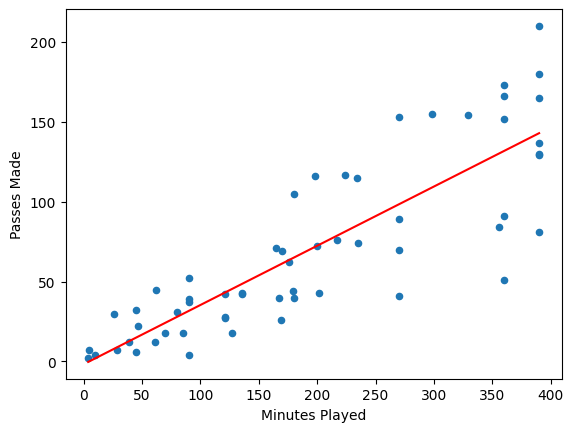

In [19]:
# Use linear regression for interactive number-of-passes predictor
# Training data: compute and show minutes-passes regression for players
# from Greece, USA, and Portugal
# Training data: Greece, USA, Portugal
train = players[
    (players.team == 'Greece') |
    (players.team == 'USA') |
    (players.team == 'Portugal')
]

a, b = np.polyfit(train.minutes, train.passes, 1)

print('Training data:')
train.plot.scatter('minutes', 'passes')
plt.xlabel('Minutes Played')
plt.ylabel('Passes Made')

x1 = train.minutes.min()
x2 = train.minutes.max()
plt.plot([x1, x2], [a*x1 + b, a*x2 + b], color='red')
plt.show()

In [21]:
# Now loop asking for a player's surname; find the number of minutes the
# player played, use the regression to predict the number of passes made,
# then check against the actual number.
#
# Once your predictor seems to be working, try surname Barry, Gomez, or Pepe.
# You probably get an error; figure out the underlying reason for the error,
# then modify your code so it prints a suitable message for surnames like these,
# instead of raising an error.
while True:
    name = input('Enter player surname (or "quit" to quit): ')

    if name == 'quit':
        break

    player = players[players.surname == name]

    if len(player) == 0:
        print('Player not found in dataset.')

    elif len(player) > 1:
        print('Multiple players share this surname. Please be more specific.')

    else:
        minutes = float(player.minutes)
        actual_passes = float(player.passes)
        predicted_passes = a * minutes + b   # y = ax + b

        print('Predicted passes:', predicted_passes)
        print('Actual passes:', actual_passes)

Enter player surname (or "quit" to quit): Kadir


/tmp/ipython-input-1035459362.py:24: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  minutes = float(player.minutes)
/tmp/ipython-input-1035459362.py:25: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  actual_passes = float(player.passes)


Predicted passes: 95.41231564728017
Actual passes: 104.0
Enter player surname (or "quit" to quit): quit


In [23]:
# BONUS!
# Repeat previous but use separate predictors for the four different positions
# (forward,midfielder,defender,goalkeeper). Does it do better?
#
# Note: To extract a string value from a dataframe element use df.iloc[0].element,
# e.g., if "player" is a one-row dataframe, then player.iloc[0].position returns
# the player's position as a string
import numpy as np

models = {}

positions = ['forward', 'midfielder', 'defender', 'goalkeeper']

for pos in positions:
    subset = players[players.position == pos]

    if len(subset) > 1:
        a, b = np.polyfit(subset.minutes, subset.passes, 1)
        models[pos] = (a, b)

In [24]:
while True:
    name = input('Enter player surname (or "quit" to quit): ')

    if name == 'quit':
        break

    player = players[players.surname == name]

    if len(player) == 0:
        print('Player not found.')

    elif len(player) > 1:
        print('Multiple players share this surname.')

    else:
        position = player.iloc[0].position
        minutes = float(player.minutes)
        actual_passes = float(player.passes)

        if position not in models:
            print('No model available for this position.')

        else:
            a, b = models[position]
            predicted_passes = a * minutes + b

            print('Position:', position)
            print('Predicted passes:', predicted_passes)
            print('Actual passes:', actual_passes)

Enter player surname (or "quit" to quit): Kadir


/tmp/ipython-input-3713580495.py:17: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  minutes = float(player.minutes)
/tmp/ipython-input-3713580495.py:18: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  actual_passes = float(player.passes)


Position: midfielder
Predicted passes: 132.54672314483247
Actual passes: 104.0
Enter player surname (or "quit" to quit): quit
